# Tutorial Exercises

In these exercises you will practice:
* Creating plots with Python
* Choosing appropriate plots for the question at hand
* Tweaking plots to make clear the important features of the data
* Adding comments that make the interpretation of plots clear

We will use some of the example datasets provided with `Seaborn`

In [109]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Titanic Data

The Titanic dataset contains information on 891 passengers from the Titanic.

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/titanic.jpg" width=50% alt="Picture of the Titanic" />


This is actually a popular dataset for people starting out with machine learning - the task is to build a model to predict who survived (you may like to try this yourself after commpleting the session on Logistic Regression after Easter).

For now let's use some plot to look at the factors affecting survival.

The dataset contains the following information on each passenger:

* **survived** 0 = No, 1 = Yes
* **pclass** 	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd
* **sex**
* **age** 	Age in years
* **sibsp** 	number of siblings and/or spouses aboard the Titanic
* **parch** 	number of parents / children aboard the Titanic
* **fare** 	Passenger fare
* **embarked** 	Port of Embarkation -	C = Cherbourg, Q = Queenstown, S = Southampton
* **class** Ticket class as a string
* **who**  man, woman or child
* **deck** 	the deck on which they slept
* **alive** same as survived, but strings
* **alone**  <tt>True</tt> only if sibsp and parch are zero


The Titanic dataset is supplied as one of the example datasets with `Seaborn`, so is stored on yuour computer with all the other files for `Seaborn`. We can load it using the special function `sns.load_dataset()`

In [2]:
# load the data - special syntax here for loading a Seaborn example dataset
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Let's first have a look at who the passengers were

**a. Were there equal numbers of men and women in each class?**

<Axes: xlabel='pclass', ylabel='count'>

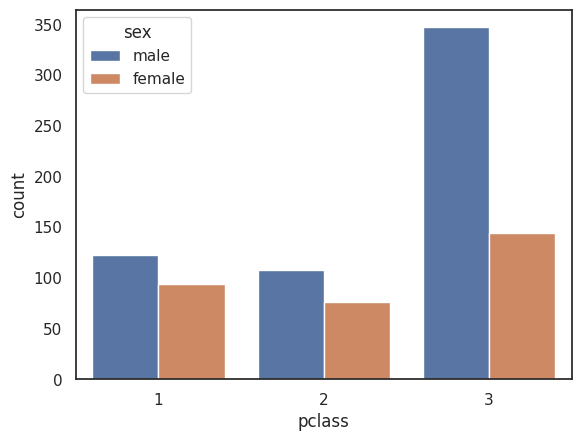

In [13]:
sns.countplot(data=titanic, x="pclass", hue="sex")

**b. What was the age distribution in each class?**

You could use a violin plot or a histogram here

Which is better and why?

**c. Were people in some classes more likely to survive?**

You could use countplot or barplot here.

Which is better and why?

<Axes: xlabel='pclass', ylabel='age'>

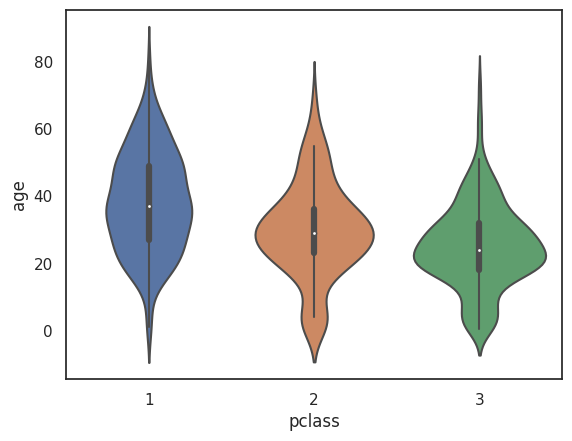

In [14]:
sns.violinplot(data=titanic,x="pclass", y='age') #Violinplot is better because histograms get crowded.

**d. Were women and children more likely to survive?**

Again you could use countplot or barplot here.

Which is better and why?

<Axes: xlabel='who', ylabel='survived'>

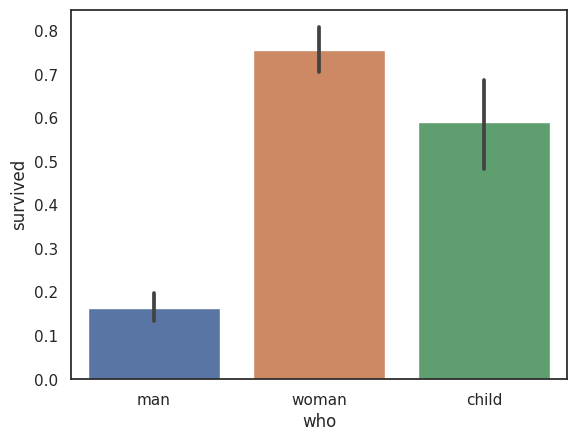

In [20]:
sns.barplot(data=titanic, x='who',y='survived') #barplot (showing mean) is better to demonstrate probability of survival.

**e. Does the answer to d) depend on the ticket class?**

As you are now plotting a barchart with data broken down by *two* categorical variables, you will need to set one as <tt>x</tt> and one as <tt>hue</tt>.

Try it both ways and see which you think is better.

Arguably having class on the x-axis is better, as we can more clearly see that women and children are more likely to survive in all classes.

That is, this relationship does not depend on ticket class. (Although there may be an interaction for the extent of higher survivability).

<function matplotlib.pyplot.show(close=None, block=None)>

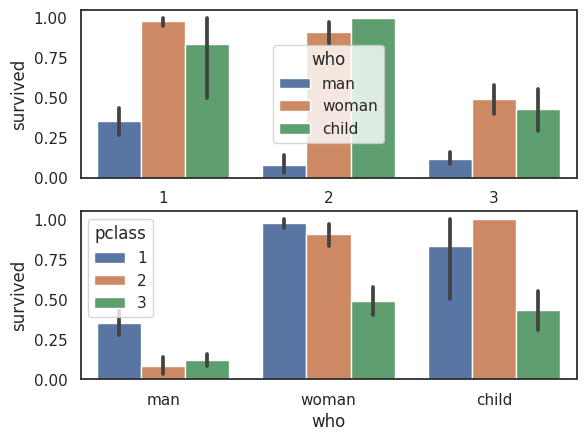

In [29]:
plt.subplot(2,1,1)
sns.barplot(data=titanic, x='pclass',y='survived', hue='who') #barplot (showing mean) is better to demonstrate probability of survival.
plt.show

plt.subplot(2,1,2)
sns.barplot(data=titanic, x='who',y='survived', hue='pclass') #barplot (showing mean) is better to demonstrate probability of survival.
plt.show

## 2. Penguin data

How can we recognise penguins of different species? Let's look at the Palmer Penguins dataset which contains data on penguins from three species (Artwork by @allison_horst):

<img src= "../images/MT_wk2_penguins.png" width="50%"  />

We can see that they differ in the shape of their bills, and their size.

Let's load the data

In [30]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


**a. Are males bigger than females?**

* Plot the mean bodyweight for each sex

* Plot the distribution of bodyweights of each sex



<function matplotlib.pyplot.show(close=None, block=None)>

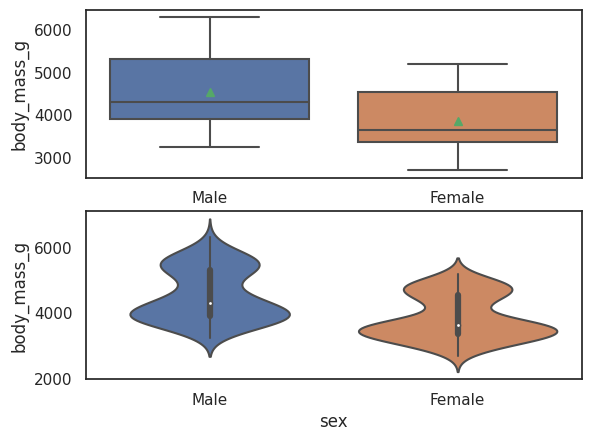

In [41]:
# your code here!
plt.subplot(2,1,1)
sns.boxplot(data=penguins, y='body_mass_g', x='sex',showmeans=True) #showing a boxplot instead of a barplot, since the IQR is relevant for comparison.
plt.show

plt.subplot(2,1,2)
sns.violinplot(data=penguins,x='sex', y='body_mass_g') #oh look! It's bimodal!
plt.show

What did we learn by plotting the distribution? Can you make a further plot to explore this discovery?

Penguin weight is bimodal!

<function matplotlib.pyplot.show(close=None, block=None)>

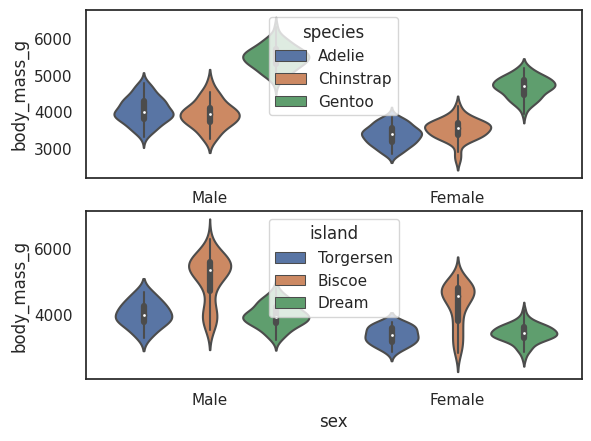

In [45]:
plt.subplot(2,1,1)
sns.violinplot(data=penguins, x='sex',y='body_mass_g',hue='species')
plt.show

plt.subplot(2,1,2)
sns.violinplot(data=penguins, x='sex',y='body_mass_g',hue='island')
plt.show

Looks like
* All species have a similar sex difference as a proportion of their size
* Indeed one species is larger - Gentoos are the big ones

**b. Is there a correlation between beak length and depth?**

Plot the data in a way that answers this question.

In [56]:
penguins.groupby('species').corr()


<ipython-input-56-105015d204d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  penguins.groupby('species').corr()


bill_length_mm  bill_depth_mm  flipper_length_mm  \
species                                                                         
Adelie    bill_length_mm           1.000000       0.391492           0.325785   
          bill_depth_mm            0.391492       1.000000           0.307620   
          flipper_length_mm        0.325785       0.307620           1.000000   
          body_mass_g              0.548866       0.576138           0.468202   
Chinstrap bill_length_mm           1.000000       0.653536           0.471607   
          bill_depth_mm            0.653536       1.000000           0.580143   
          flipper_length_mm        0.471607       0.580143           1.000000   
          body_mass_g              0.513638       0.604498           0.641559   
Gentoo    bill_length_mm           1.000000       0.643384           0.661162   
          bill_depth_mm            0.643384       1.000000           0.706563   
          flipper_length_mm        0.661162       0.706563           1.000000   
          body_mass_g              0.669166       0.719085           0.702667   

                             body_mass_g  
species                                   
Adelie    bill_length_mm        0.548866  
          bill_depth_mm         0.576138  
          flipper_length_mm     0.468202  
          body_mass_g           1.000000  
Chinstrap bill_length_mm        0.513638  
          bill_depth_mm         0.604498  
          flipper_length_mm     0.641559  
          body_mass_g           1.000000  
Gentoo    bill_length_mm        0.669166  
          bill_depth_mm         0.719085  
          flipper_length_mm     0.702667  
          body_mass_g           1.000000

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

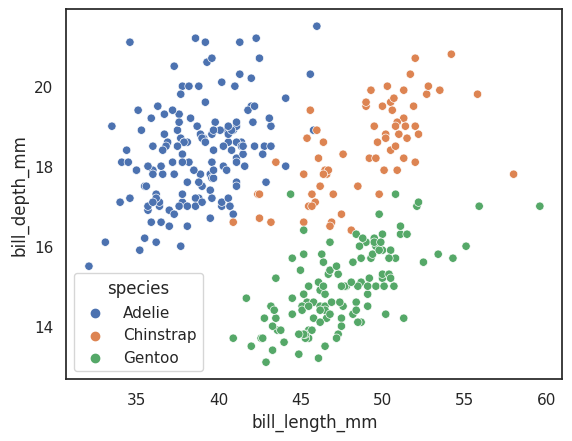

In [78]:
sns.scatterplot(data=penguins, x='bill_length_mm',y='bill_depth_mm', hue='species')

Do you notice some clusters in the plot? How could they be explained?

Modify your plot using the 'hue' argument to test your hypothesis.

Summarize your findings in plain English.


Answer: There is a weak correlation overall, but when correcting for inter-species differences we find that these correlations are moderate in size, though notably weaker for Adelie (r=0.39) than Chinstrap (r=0.65) and Gentoo (r=0.64).

Generally, penguins with broader longer tend to have deeper beaks too.

## 3. Parietal neurons dataset

I mentioned that Seaborn was built by a neuroscientist, Michael Waskom, and a couple of the example datasets are from neuroscience.

Here we explore the <tt>dots</tt> dataset, from a study by <a href="https://pubmed.ncbi.nlm.nih.gov/12417672/">Roitman and Shadlen (2002)</a>. This study contains firing rates over time from neurons in the parietal cortex of a monkey performing a perceptual decision-making task.

In the task, the monkey observes a *random dot kinematogram* - a stimulus containing dots that mainly move about at random. A small proportion of dots move **coherently** towards the left or right (or in this case, upwards!).

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk2_RDKUP.gif" width=25% />

The monkey's task is to indicate the direction in which the dots are moving - instead of pressing a button, the monkey moves its gaze to one of two targets on the screen:

* left = move eyes to target T1
* right = move gaze to target T2


The explanation for this dataset is somewhat involved (although PPL and BMS students will in fact cover this study in lectures after Christmas) but it may be helpful to see the following figure, which is what we are eventually aiming for:

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/images/MT_wk2_cells.png" width=75% />

**We are going to try and reproduce this figure**

Let's start by loading the data and plotting the timeseries:

In [60]:
dots = sns.load_dataset('dots') # this syntax only works for the Seaborn example datasets
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


The dataset contains timeseries alligned to two timepoints:
* stimulus onset (<tt>align == 'dots'</tt>)
* response onset (<tt>align == 'sacc'</tt>)
    
We are going to split the dataframe and deal with these separately:

In [61]:
dots_stimulus = dots.query('align == "dots"')
dots_response = dots.query('align == "sacc"')

Let's start with the stimulus-locked data.

**a. Plot the timeseries data: firing rate over time**

<Axes: xlabel='time', ylabel='firing_rate'>

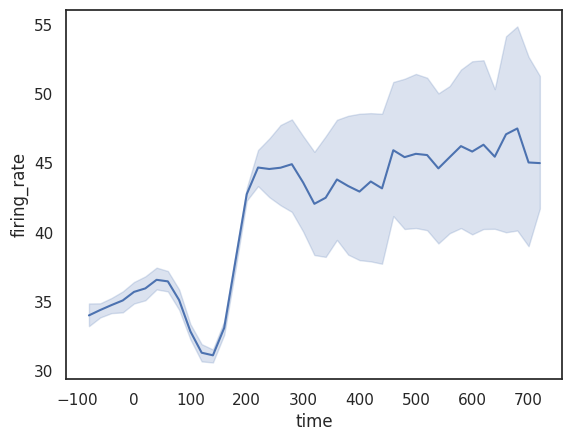

In [65]:
sns.lineplot(data=dots_stimulus, x='time',y='firing_rate')

Time zero is the onset of the moving dots. We can see that firing rate initially dips, then rises over the course of several hundred milliseconds.

* what do your notice about the variability in firing rate?

Diverges around 200ms after stimulus onset.

* Could some of this variability be explained by the other variables in the dataset?

Potentially by the choice.


**b. Separate firing rates for chosen and unchosen target**

Parietal neurons are tuned to locations in space. It turns out that each neuron is more active when an eye movement is planned towards its prefered target.

This dataset is coded such that T1 is always the preferred location of the cell being recorded.
* T1 is actually a different location in space for each neuron!

On some trials T1 is chosen, and on other trials T2 (a non-preferred location) is chosen.

Let's plot these separately using the <tt>hue</tt> argument:

<Axes: xlabel='time', ylabel='firing_rate'>

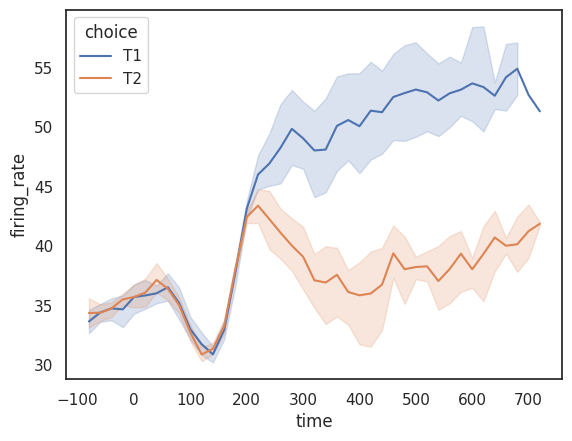

In [66]:
sns.lineplot(data=dots_stimulus, x='time',y='firing_rate', hue='choice')


What do you see? Describe the graph in words.

**Answer**: There's a clear difference in post-saccade (around 200ms) firing rate of individual neurons is higher when a saccade is made towards the neuron's preferred target (T1) compared to saccades towards non-preferred targets (T2).

**c. Effect of task difficulty**

The difficulty of the task, and hence the time needed to reach a decision, depends on the *proportion of coherent motion* (ie what % of dots are moving to the right, or left, rather than randomly)

When only a small percentage of dots are moving coherently, the monkey needs to stare at the stimulus for a long time to work out whether the dots are moving left or right.

Let's try breaking down the traces by level of coherence

* <tt>coherence</tt> = % dots moving left (or right) rather than randomly

You previously used `hue` (line colour) to break down the data by the <tt>choice</tt> (T1/T2). You can use `style` (different line styles) to further break down the data.

<Axes: xlabel='time', ylabel='firing_rate'>

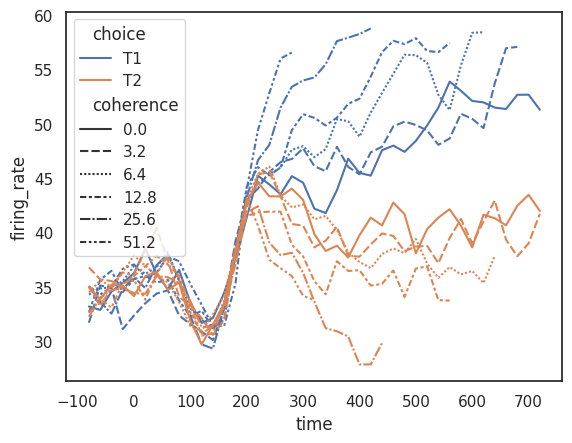

In [68]:
sns.lineplot(data=dots_stimulus, x='time',y='firing_rate', hue='choice', style='coherence')

**d. Explore use of hue and style to best represent the data**

If you used <tt>hue = choice</tt> and <tt>style = coherence</tt> above, try switching these.

<Axes: xlabel='time', ylabel='firing_rate'>

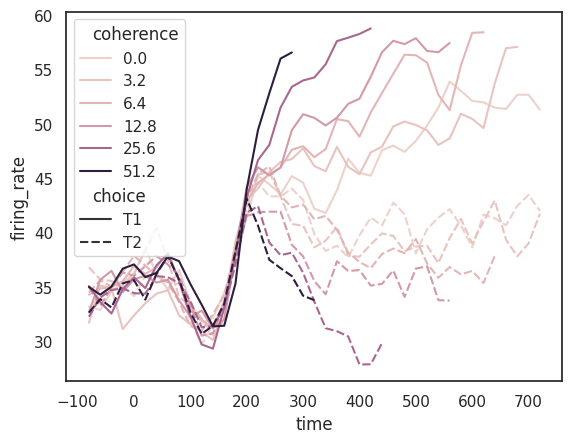

In [69]:
sns.lineplot(data=dots_stimulus, x='time',y='firing_rate', hue='coherence', style='choice')

* I think this plot shows the structure in the data much more clearly than the one in part c.
* What makes it clearer?
    * which is more striking - colour (hue) or linestyle (style)
    * which more clearly conveys an ordering (from low to high coherence) - colour or line style?

**e. Plot data aligned to response**

The traces for T1 trials all seem to end when the firing rate reaches about 60Hz - this happens earliest for high coherence trials.

The reason the traces end is because at this point, the monkey releases an eye movement.

Now let's plot the data aligned to the response, which we put in a separate dataframe way back at the start of this section. You can use the same plot style as in part d.

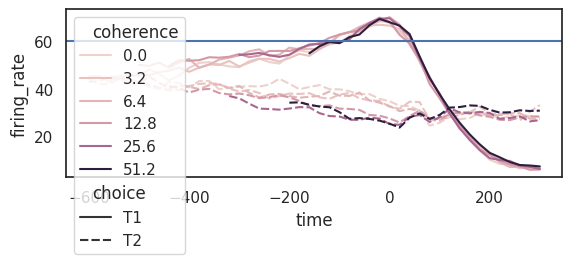

In [88]:
sns.lineplot(data=dots_response, x='time',y='firing_rate', hue='coherence', style='choice')
plt.axhline(y=60)
plt.show()

Focussing on trials in which <tt>choice == T1</tt>, we see:

* Aligining the data the the response brings the point at which each trace reaches threshold (60Hz firing rate) into line.
* Now we see the trace for low-coherence trials stretches further back in time than those for short coherence trials (this is the effect is also seen in the stimulus-locked plot)

**f. Compare plots of stimulus- and response-locked data**

Let's use `plt.subplot()` to plot the stimulus and response-locked data.

* Would it be best to plot the data one above the other, or side by side? Why?
* Think about what needs to match between the axes to facilitate comparison
* Do you need to adjust the figure size to make enough space for both subplots?

TypeError: ignored

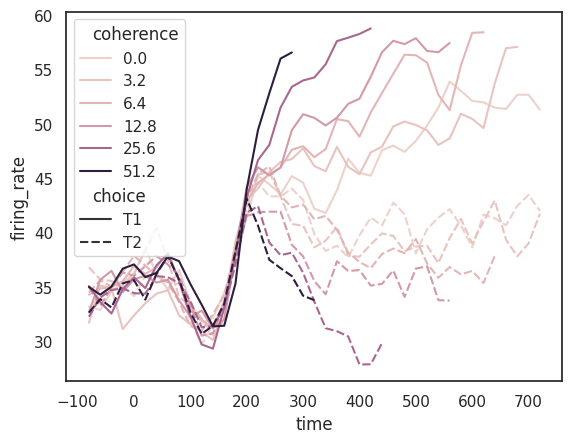

In [117]:
sns.lineplot(data=dots_stimulus, x='time',y='firing_rate', hue='coherence', style='choice')
plt.ylim(0,80)

**Note-**

From the stimulus-locked graph, it looks like the neurons are ramping up to a threshold.

Paired with the response-locked graph, this result is extremely convincing. This is because of the aligned peaks and the sudden drop-off of firing rate after the threshold is reached.

**Aside-**

You might have noticed that the threshold/peak looks higher in the response-locked graph!
This looks a bit odd.

It is because the traces in the stimulus-locked graph are truncated 100ms before motion onset.
* Check what the firing rate is at time -100ms in the response-locked graph (hopefully similar tho the traces' end-points in the stimulus-locked plot)